First few rows of the data:
   body_impedance        bmi      weight      height  bone_density  \
0      320.638729  24.130828   85.996885  181.667477      1.110072   
1      506.521602  31.679688   48.461738  170.691185      1.139474   
2      332.258864  25.429558   66.335244  158.408471      0.864233   
3      430.617946  22.018685  119.187945  152.938225      1.000705   
4      737.904277  24.062372   56.471538  186.820560      1.157905   

   visceral_fat_index  body_fat_percentage  muscle_mass  water_percentage  \
0                   2            19.789087    61.289928         47.355164   
1                  18            12.577282    65.155212         54.686965   
2                   3            30.616716    35.166759         46.856532   
3                  14            14.295902    51.265412         58.708156   
4                  17            37.139950    68.820916         55.928559   

   basal_metabolic_rate  bone_mass  protein_percentage  metabolic_age  
0           1789

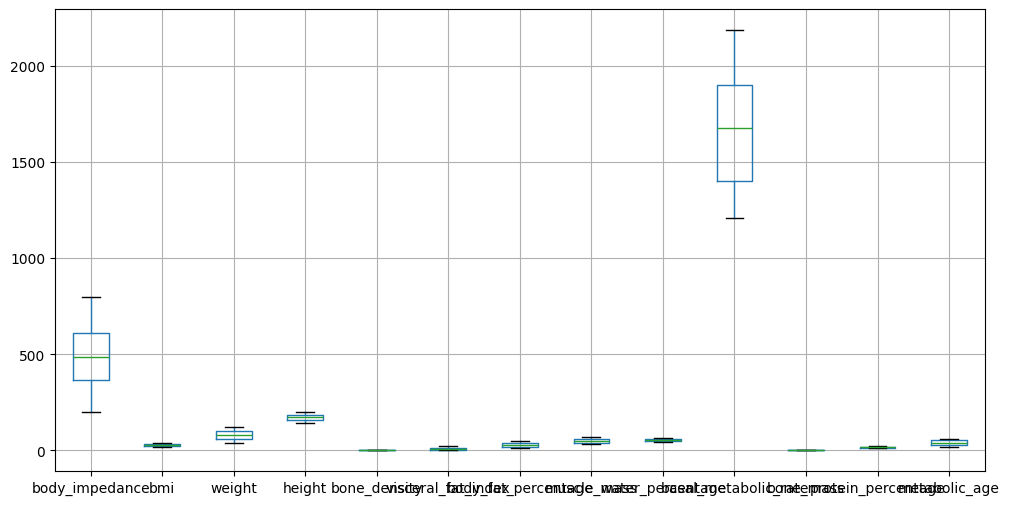

In [3]:
import pandas as pd

# Load the synthetic data (assuming the file is in the current working directory)
data = pd.read_csv('synthetic_user_data.csv')

# Display the first few rows of the data
print("First few rows of the data:")
print(data.head())

# Display column names
print("\nColumn names:")
print(data.columns)

# Summary statistics of the data
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Visualize the data for outliers (boxplot for each column)
import matplotlib.pyplot as plt

data.boxplot(figsize=(12, 6))
plt.show()


In [4]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# If any missing values are found, you can either fill them or drop rows/columns
# Example: Filling missing values with the mean of the respective column
data.fillna(data.mean(), inplace=True)


Missing values:
body_impedance          0
bmi                     0
weight                  0
height                  0
bone_density            0
visceral_fat_index      0
body_fat_percentage     0
muscle_mass             0
water_percentage        0
basal_metabolic_rate    0
bone_mass               0
protein_percentage      0
metabolic_age           0
dtype: int64


In [7]:
import numpy as np
from scipy import stats

# Detecting outliers using Z-score method
z_scores = stats.zscore(data.select_dtypes(include=[float, int]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]


In [9]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Normalize the numeric columns (you can exclude non-numeric columns like "Metabolic Age")
numeric_cols = data.select_dtypes(include=[float, int]).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Check the normalized data
print(data.head())


   body_impedance       bmi    weight    height  bone_density  \
0       -1.099996 -0.391782  0.227119  0.606794      0.991069   
1        0.086230  0.700954 -1.369232 -0.021879      1.268104   
2       -1.025841 -0.203784 -0.609081 -0.725378     -1.325243   
3       -0.398155 -0.697526  1.638717 -1.038689     -0.039398   
4        1.562817 -0.401692 -1.028579  0.901939      1.441757   

   visceral_fat_index  body_fat_percentage  muscle_mass  water_percentage  \
0           -1.309511            -0.770060     0.986552         -1.282662   
1            1.429336            -1.378543     1.314817         -0.041193   
2           -1.138333             0.143501    -1.231997         -1.367094   
3            0.744624            -1.233537     0.135205          0.639702   
4            1.258158             0.693886     1.626132          0.169042   

   basal_metabolic_rate  bone_mass  protein_percentage  metabolic_age  
0              0.389215   1.245998           -0.248319      -1.069175  
1 

In [10]:
# Example: Create BMI category
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data['bmi_category'] = data['bmi'].apply(categorize_bmi)

# Check new feature
print(data[['bmi', 'bmi_category']].head())


        bmi bmi_category
0 -0.391782  Underweight
1  0.700954  Underweight
2 -0.203784  Underweight
3 -0.697526  Underweight
4 -0.401692  Underweight


In [13]:
# Display the columns in your dataset
print(data.columns)


Index(['body_impedance', 'bmi', 'weight', 'height', 'bone_density',
       'visceral_fat_index', 'body_fat_percentage', 'muscle_mass',
       'water_percentage', 'basal_metabolic_rate', 'bone_mass',
       'protein_percentage', 'metabolic_age', 'bmi_category'],
      dtype='object')


In [14]:
# List of selected features (adjust based on what makes sense for your model)
selected_features = [
    'weight', 'height', 'bmi', 'bone_density', 'visceral_fat_index',
    'body_fat_percentage', 'muscle_mass', 'water_percentage', 'basal_metabolic_rate',
    'bone_mass', 'protein_percentage', 'metabolic_age'
]

# Check if all selected features are in the dataset
X = data[selected_features]

# For the target variable (what you want the model to predict), update this accordingly
# If you want to predict something like nutrition guidance or physical activity recommendations, use that column
# Example: if you have a column 'target_column', replace 'target_column' with the actual column name
y = data['bmi_category']  # Replace with your actual target column name if it's different

# Check the first few rows to ensure everything is selected correctly
print(X.head())
print(y.head())


     weight    height       bmi  bone_density  visceral_fat_index  \
0  0.227119  0.606794 -0.391782      0.991069           -1.309511   
1 -1.369232 -0.021879  0.700954      1.268104            1.429336   
2 -0.609081 -0.725378 -0.203784     -1.325243           -1.138333   
3  1.638717 -1.038689 -0.697526     -0.039398            0.744624   
4 -1.028579  0.901939 -0.401692      1.441757            1.258158   

   body_fat_percentage  muscle_mass  water_percentage  basal_metabolic_rate  \
0            -0.770060     0.986552         -1.282662              0.389215   
1            -1.378543     1.314817         -0.041193             -0.019985   
2             0.143501    -1.231997         -1.367094             -1.006149   
3            -1.233537     0.135205          0.639702             -0.152015   
4             0.693886     1.626132          0.169042              1.427984   

   bone_mass  protein_percentage  metabolic_age  
0   1.245998           -0.248319      -1.069175  
1  -0.5391

In [15]:
# Fill missing values with the mean of the respective column
X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])  # For target variable (e.g., 'bmi_category'), fill with the mode if categorical


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# If your target column is categorical (e.g., 'bmi_category'), encode it
y = label_encoder.fit_transform(y)


In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the training and testing datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (80, 12)
Testing data shape: (20, 12)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [19]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Output the training completion
print("Model training complete.")


Model training complete.


In [20]:
# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [21]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'health_model.pkl')

print("Model saved as 'health_model.pkl'")


Model saved as 'health_model.pkl'


In [27]:
# Define recommendations for each category
recommendations = {
    "Underweight": {
        "nutrition": "Increase calorie intake with nutrient-rich foods like nuts, avocados, and whole grains. Consider protein-rich shakes.",
        "activity": "Focus on strength training exercises to build muscle mass. Avoid excessive cardio."
    },
    "Normal": {
        "nutrition": "Maintain a balanced diet with proteins, carbohydrates, fats, and plenty of fruits and vegetables.",
        "activity": "Incorporate a mix of strength training and cardio. Aim for 30 minutes of activity daily."
    },
    "Overweight": {
        "nutrition": "Reduce calorie-dense foods. Focus on lean proteins, vegetables, and whole grains. Avoid sugary snacks.",
        "activity": "Engage in moderate cardio exercises like brisk walking or cycling. Include light strength training."
    },
    "Obese": {
        "nutrition": "Adopt a low-calorie diet under professional supervision. Emphasize vegetables, lean protein, and whole grains.",
        "activity": "Start with low-impact exercises like walking or swimming. Gradually include strength training."
    }
}


In [28]:
def get_recommendations(user_data, model, recommendations):
    """
    Generate nutrition and activity recommendations based on user data.
    
    Args:
        user_data (dict): User's health metrics as a dictionary.
        model: Trained machine learning model.
        recommendations (dict): Recommendation rules for each BMI category.
    
    Returns:
        dict: Nutrition and activity recommendations.
    """
    # Convert user data to DataFrame for prediction
    user_df = pd.DataFrame([user_data])
    
    # Predict BMI category
    predicted_category = model.predict(user_df)[0]
    
    # Fetch recommendations
    recs = recommendations.get(predicted_category, {"nutrition": "No recommendation available", "activity": "No recommendation available"})
    return {
        "predicted_category": predicted_category,
        "nutrition": recs["nutrition"],
        "activity": recs["activity"]
    }


In [30]:
example_user_data = {
    "body_impedance": 500,
    "bmi": 24.5,
    "weight": 68,
    "height": 170,
    "bone_density": 1.5,
    "visceral_fat_index": 8,
    "body_fat_percentage": 18,
    "muscle_mass": 50,
    "water_percentage": 60,
    "basal_metabolic_rate": 1600,
    "bone_mass": 3,
    "protein_percentage": 16,
    "metabolic_age": 25,
    "bmi_category": "Normal"  # This might need exclusion depending on how it was handled during training
}


In [31]:
def align_features(user_data, training_columns):
    """
    Align user input data with training features.
    Args:
        user_data (dict): Dictionary containing user input.
        training_columns (list): List of columns used during model training.
    Returns:
        pd.DataFrame: Aligned user data.
    """
    aligned_data = {col: [user_data.get(col, 0)] for col in training_columns if col != "bmi_category"}
    return pd.DataFrame(aligned_data)

# Align features
training_columns = [
    'body_impedance', 'bmi', 'weight', 'height', 'bone_density',
    'visceral_fat_index', 'body_fat_percentage', 'muscle_mass',
    'water_percentage', 'basal_metabolic_rate', 'bone_mass',
    'protein_percentage', 'metabolic_age'
]
user_df = align_features(example_user_data, training_columns)


In [33]:
print(loaded_model.feature_names_in_)


['weight' 'height' 'bmi' 'bone_density' 'visceral_fat_index'
 'body_fat_percentage' 'muscle_mass' 'water_percentage'
 'basal_metabolic_rate' 'bone_mass' 'protein_percentage' 'metabolic_age']


In [34]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Model Evaluation:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Model Evaluation:
              precision    recall  f1-score   support

 Underweight       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Accuracy: 1.00


In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=model.classes_)


C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [37]:
import joblib

# Define the model filename
model_filename = "health_guidance_model.pkl"

# Save the trained model to the file
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to health_guidance_model.pkl


In [38]:
# Load the saved model
loaded_model = joblib.load("health_guidance_model.pkl")

# Example of making a prediction with new data
example_data = {
    "body_impedance": 500,
    "bmi": 24.5,
    "weight": 68,
    "height": 170,
    "bone_density": 1.5,
    "visceral_fat_index": 8,
    "body_fat_percentage": 18,
    "muscle_mass": 50,
    "water_percentage": 60,
    "basal_metabolic_rate": 1600,
    "bone_mass": 3,
    "protein_percentage": 16,
    "metabolic_age": 25
}

# Align the example data with the training features
example_df = align_features(example_data, training_columns)

# Make a prediction
predicted_category = loaded_model.predict(example_df)[0]
print(f"Predicted Category: {predicted_category}")


Predicted Category: Underweight
